# Import Library and Data

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
from google.colab import drive,files
import pickle
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np      
import matplotlib.dates as mdates
import math,time        
import datetime
import statsmodels
from statsmodels.formula.api import ols
from statsmodels.tsa.stattools import adfuller
from datetime import date,timedelta ,datetime 
from pandas.plotting import autocorrelation_plot                                      # Importing package numpys (For Numerical Python)
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression,HuberRegressor,ElasticNet,PassiveAggressiveRegressor, Lasso, Ridge, Lars,BayesianRidge
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor,AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold,GridSearchCV,TimeSeriesSplit
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import statsmodels.api as sm
import xgboost as xgb
from sklearn.kernel_ridge import KernelRidge
import lightgbm as ltb
from sklearn.neighbors import KNeighborsRegressor
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt    
# Import plotly modules to view time series in a more interactive way
import plotly.graph_objects as go
plt.style.use('bmh')                                 # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset = files.upload()

Saving Train.csv to Train.csv


# Exploratory Data Analysis

In [ ]:
dataset = pd.read_csv('Train.csv')

In [ ]:
dataset['date_time']  =  pd.to_datetime(dataset['date_time'],infer_datetime_format = True)

In [ ]:
dataset.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


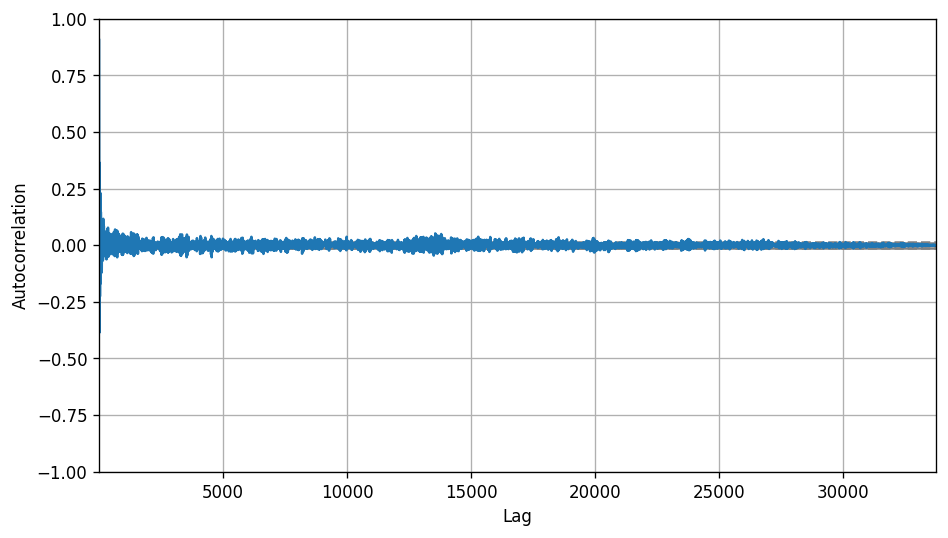

In [ ]:
plt.rcParams.update({'figure.figsize':(9,5),'figure.dpi':120})
autocorrelation_plot(dataset.traffic_volume.tolist())

In [ ]:
result = adfuller(dataset.traffic_volume)
labels = ['ADF Test','p-value','no. of lags used','no. of observation used']
dfoutput  =  pd.Series(result[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result[4].items():
   dfoutput['Critical Value (%s)'%key]  =  value
print('Results of Dickey Fuller Test:')    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -23.779660
p-value                            0.000000
#Lags Used                        48.000000
Number of Observations Used    33701.000000
Critical Value (1%)               -3.430544
Critical Value (5%)               -2.861626
Critical Value (10%)              -2.566816
dtype: float64


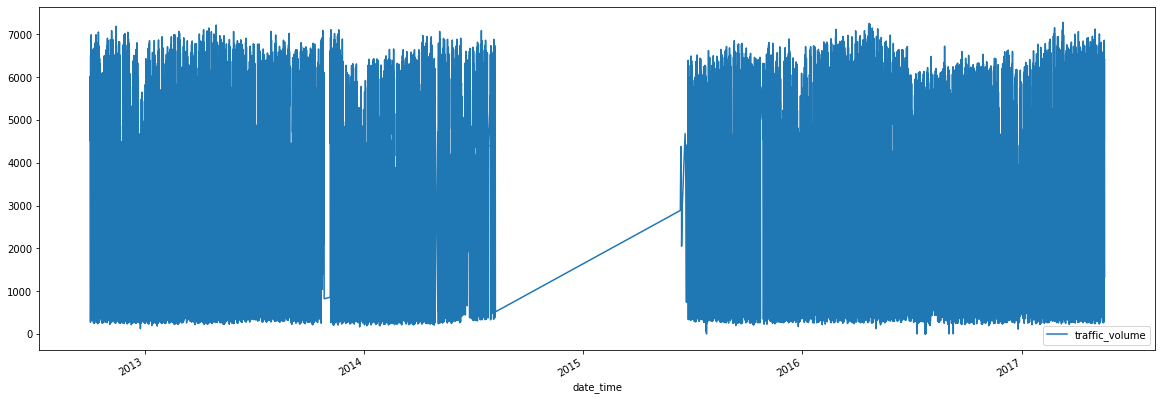

In [ ]:
dataset.set_index('date_time')[['traffic_volume']].plot(figsize = (20,7))

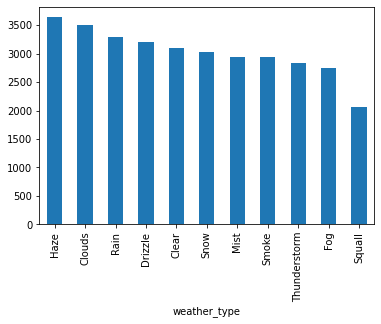

In [ ]:
dataset.groupby(['weather_type'])['traffic_volume'].mean().sort_values(ascending=False).plot(kind='bar')

In [ ]:
dataset['Hour'] = dataset['date_time'].dt.hour
dataset['Day'] = dataset['date_time'].dt.day
dataset['Month'] = dataset['date_time'].dt.month
dataset['Year'] = dataset['date_time'].dt.year
dataset['is_holiday'] = dataset['is_holiday'].map(lambda x: 0 if x=='None' else 1)
encoder = OrdinalEncoder(categories=[['Squall','Fog','Thunderstorm','Smoke','Mist','Snow','Clear','Drizzle','Rain','Clouds','Haze']])
dataset['weather_type']=encoder.fit_transform(dataset.loc[:,['weather_type']])
dataset.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,Hour,Day,Month,Year
0,2012-10-02 09:00:00,0,121,89,2,329,1,1,288.28,0.0,0.0,40,9.0,scattered clouds,5545,9,2,10,2012
1,2012-10-02 10:00:00,0,178,67,3,330,1,1,289.36,0.0,0.0,75,9.0,broken clouds,4516,10,2,10,2012
2,2012-10-02 11:00:00,0,113,66,3,329,2,2,289.58,0.0,0.0,90,9.0,overcast clouds,4767,11,2,10,2012
3,2012-10-02 12:00:00,0,20,66,3,329,5,5,290.13,0.0,0.0,90,9.0,overcast clouds,5026,12,2,10,2012
4,2012-10-02 13:00:00,0,281,65,3,329,7,7,291.14,0.0,0.0,75,9.0,broken clouds,4918,13,2,10,2012


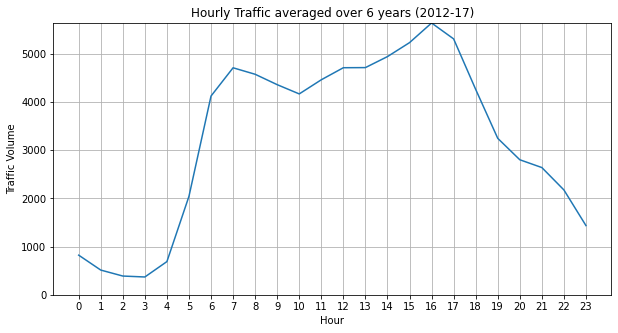

In [ ]:
dataset.groupby('Hour')['traffic_volume'].mean().plot(figsize = (10,5))
_ = plt.ylabel('Traffic Volume')
_ = plt.ylim([0, max(dataset.groupby('Hour')['traffic_volume'].mean()) ])
_ = plt.xticks(dataset['Hour'].unique())
_ = plt.title('Hourly Traffic averaged over 6 years (2012-17)')
_ = plt.grid(b=True)

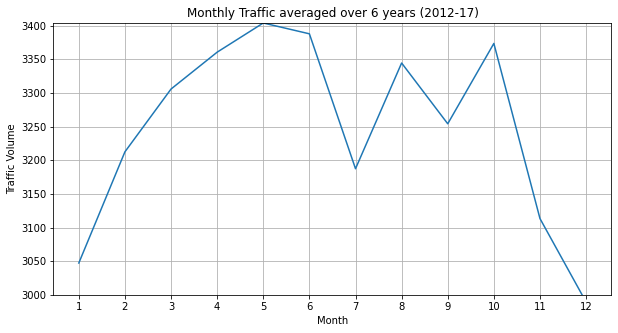

In [ ]:
##Plotting average monthly traffic
dataset.groupby('Month')['traffic_volume'].mean().plot(figsize = (10,5))
_ = plt.ylabel('Traffic Volume')
_ = plt.ylim([3000, max(dataset.groupby('Month')['traffic_volume'].mean())])
_ = plt.xticks(dataset['Month'].unique())
_ = plt.title('Monthly Traffic averaged over 6 years (2012-17)')
_ = plt.grid(b=True)

In [ ]:
weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}
dataset['weekday'] = dataset.date_time.dt.weekday.map(weekdays)

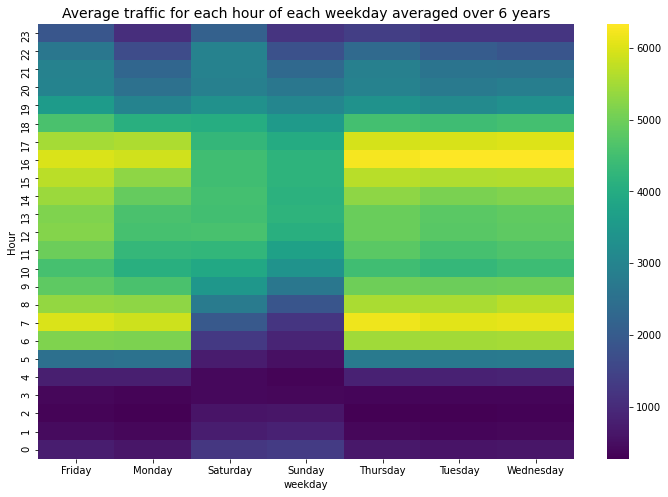

In [ ]:
#plotting a heatmap with a colorbar; the colorbar shows the traffic
#traffic volume for that particular hour of the weekday
hour_weekday = dataset.pivot_table(values='traffic_volume', index='Hour', columns = 'weekday', aggfunc = 'mean')
_ = plt.figure(figsize=(12, 8))
ax = sns.heatmap(hour_weekday.sort_index(ascending = False), cmap='viridis')
_ = ax.set_title("Average traffic for each hour of each weekday averaged over 6 years", fontsize = 14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


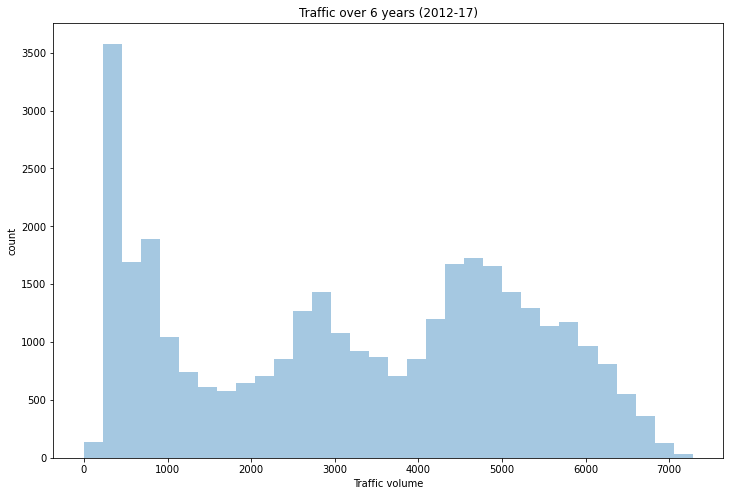

In [ ]:
_ = plt.figure(figsize = (12,8))
_ = sns.distplot(dataset['traffic_volume'], kde=False)
_ = plt.title('Traffic over 6 years (2012-17)')
_ = plt.xlabel('Traffic volume')
_ = plt.ylabel('count')

In [ ]:
#adding in another column which indicates 'non-working' days which include weekends and holidays
dataset['non_working'] = dataset.apply(lambda x: 'non-working' if \
                                         ((x['is_holiday'] == 1) or (x['weekday'] in ['Saturday', 'Sunday']))
                                         else 'working', axis = 1)

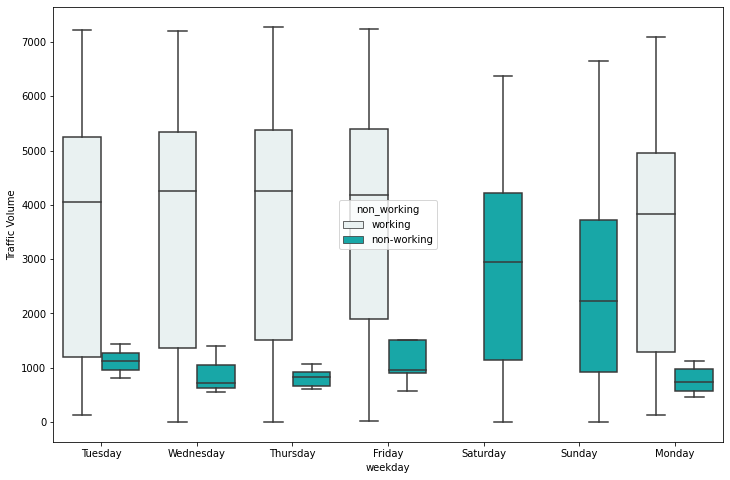

In [ ]:
_ = plt.figure(figsize = (12,8))
_ = sns.boxplot(x = 'weekday', y = 'traffic_volume', data = dataset, color='c', hue='non_working')
_ = plt.ylabel('Traffic Volume')

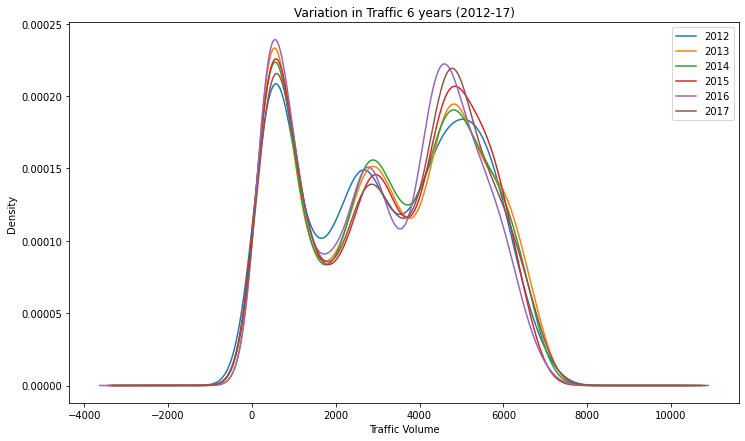

In [ ]:
for year in dataset['Year'].unique():
    dataset[dataset['Year'] == year]['traffic_volume'].plot(kind='density', figsize = (12,7), legend = True, label = year)
_ = plt.xlabel('Traffic Volume')
_ = plt.title('Variation in Traffic 6 years (2012-17)')

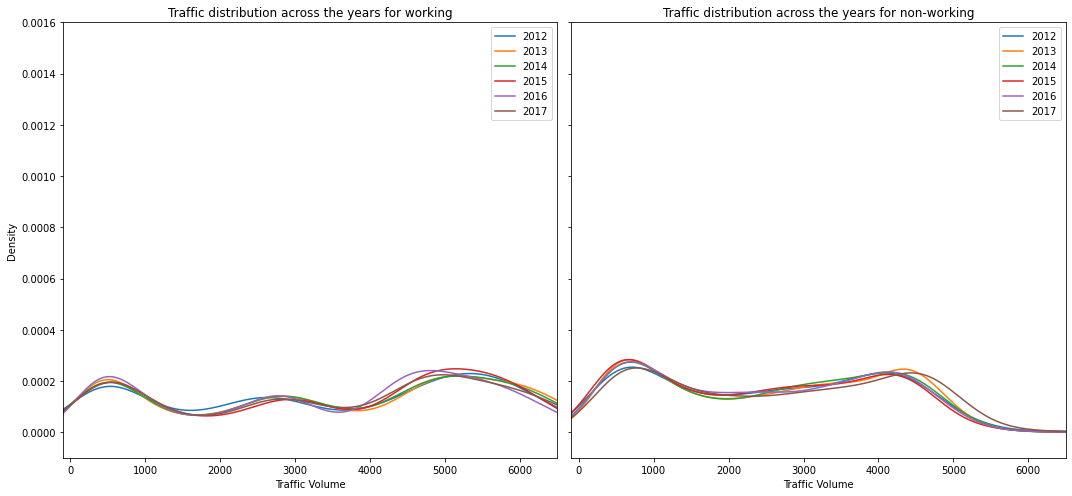

In [ ]:
vacation = ['working', 'non-working']
#color_names = ["tab:blue", "tab:orange", "tab:green", "tab:red" , "tab:purple"]
for i, vacation in enumerate(vacation):
    
    ax = plt.subplot(121+i)
    for j, year in enumerate(dataset['Year'].unique()):
        _ = dataset[(dataset['Year'] == year) & (dataset['non_working'] == vacation)]['traffic_volume'].plot(kind='density', figsize=(15,7), legend=True, label= year, sharey=True)
    _ = plt.title('Traffic distribution across the years for '+vacation)
    _ = plt.ylim(-0.0001, 0.0016)
    _ = plt.xlim(-100, 6500)
    _ = plt.xlabel('Traffic Volume')

_ = plt.tight_layout()

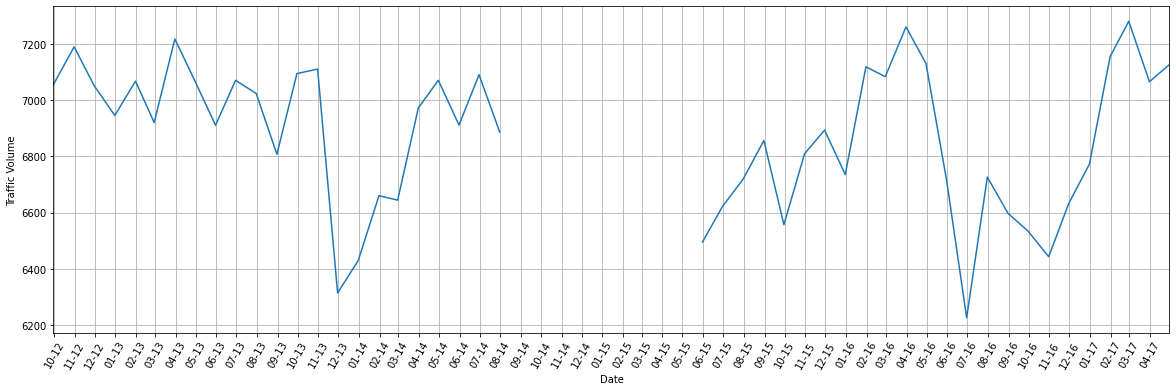

In [ ]:
# Resampling the traffic data monthly and calculating the max traffic volume for each month
dataindex = dataset.set_index('date_time')
monthly_en = dataindex.resample('M', label = 'left')['traffic_volume'].max()
_ = plt.figure(figsize = (20,6))
#plotting the max monthly traffic volume
_ = plt.plot(monthly_en)
# ensuring the limits on x axis to be between the dataframe's datetime limits
_ = plt.xlim(monthly_en.index.min(), monthly_en.index.max())
# Using matplotlib MonthLocator to be used in the xticks to mark individual months
locator = mdates.MonthLocator(bymonthday = 1, interval = 1)  # every 2 months 
fmt = mdates.DateFormatter('%m-%y')  # xticks to be displayed as 01-14 (i.e. Jan'14) and so on
X = plt.gca().xaxis
# Setting the locator
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
_ = plt.xticks(rotation = 60)
_ = plt.ylabel('Traffic Volume')
_ = plt.xlabel('Date')
_ = plt.grid(b=True)

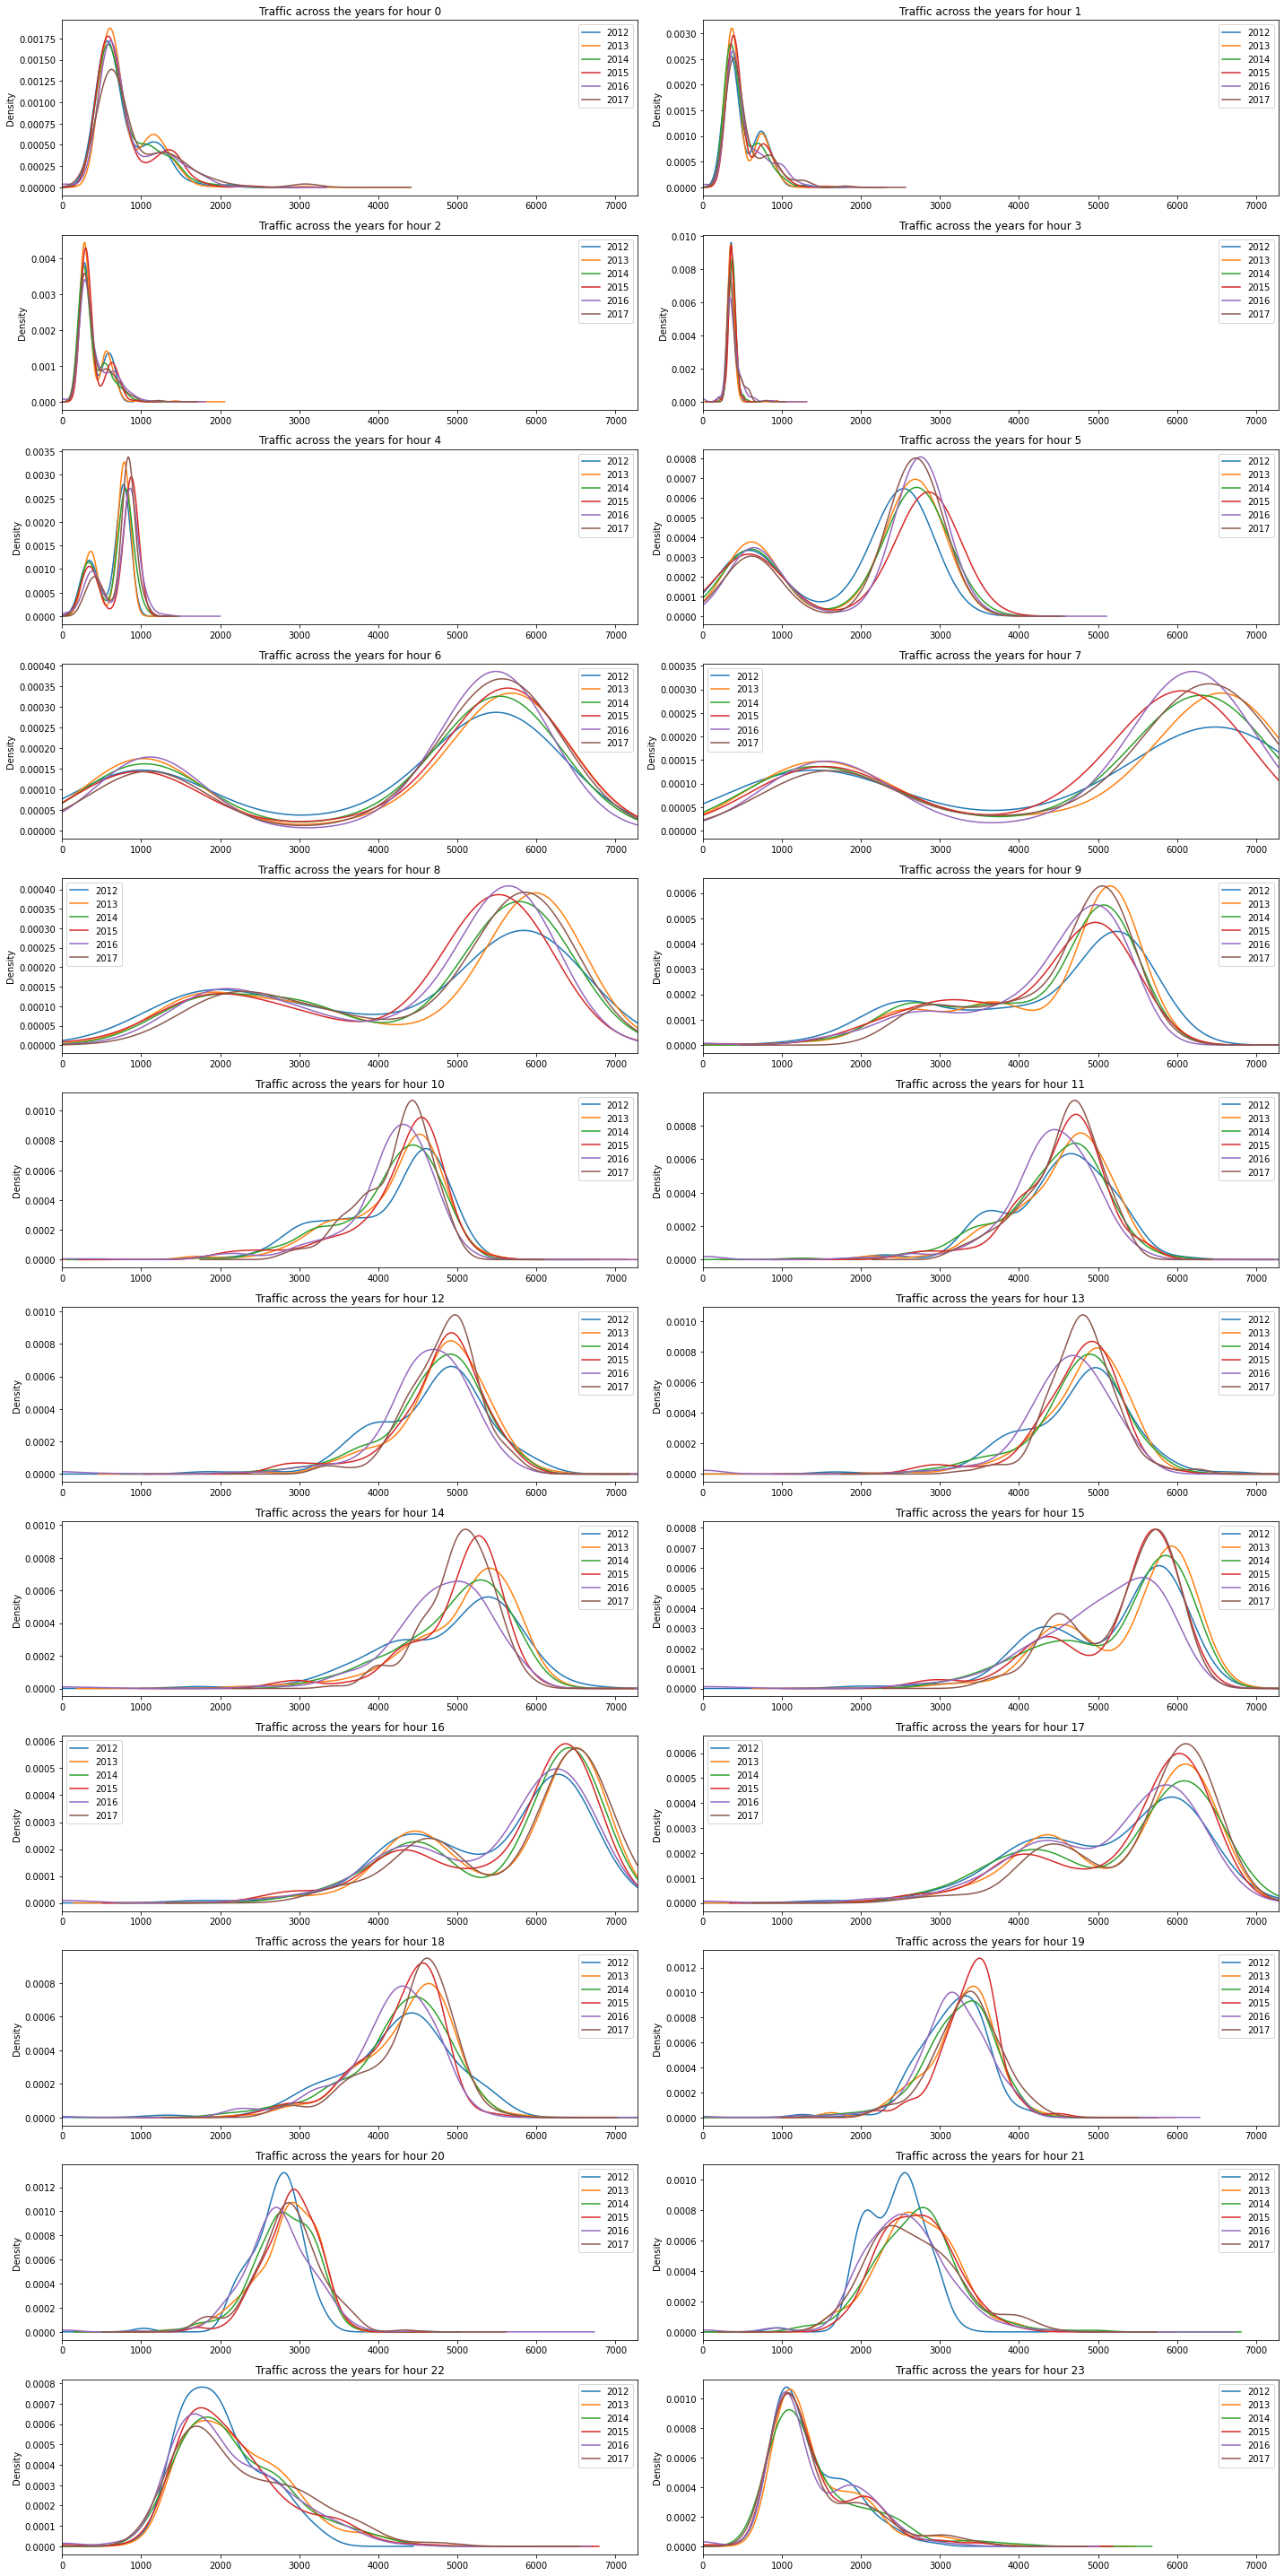

In [ ]:
f = plt.figure(figsize = (20,40))
peak_hours = np.arange(0,24) 
for i, hour in enumerate(peak_hours):
    ax = f.add_subplot(12,2,i+1)
    for j, year in enumerate(dataset['Year'].unique()):
        dataset[(dataset['Year'] == year) & (dataset['Hour'] == hour)]['traffic_volume'].\
                                plot(kind='density',  sharey=False, legend=True, label= year)# ,\
                                #c = color_names[j])
    plt.title('Traffic across the years for hour '+str(hour))
    plt.xlim(np.min(dataset.traffic_volume.values), np.max(dataset.traffic_volume.values))
plt.tight_layout()

In [ ]:
dataset.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,Hour,Day,Month,Year,weekday,non_working
0,2012-10-02 09:00:00,0,121,89,2,329,1,1,288.28,0.0,0.0,40,9.0,scattered clouds,5545,9,2,10,2012,Tuesday,working
1,2012-10-02 10:00:00,0,178,67,3,330,1,1,289.36,0.0,0.0,75,9.0,broken clouds,4516,10,2,10,2012,Tuesday,working
2,2012-10-02 11:00:00,0,113,66,3,329,2,2,289.58,0.0,0.0,90,9.0,overcast clouds,4767,11,2,10,2012,Tuesday,working
3,2012-10-02 12:00:00,0,20,66,3,329,5,5,290.13,0.0,0.0,90,9.0,overcast clouds,5026,12,2,10,2012,Tuesday,working
4,2012-10-02 13:00:00,0,281,65,3,329,7,7,291.14,0.0,0.0,75,9.0,broken clouds,4918,13,2,10,2012,Tuesday,working


# Defining Basic Functions 

In [ ]:
# Creating an empty dict to save all the erros from different models
dict_error = dict()

In [ ]:
# creating function for plotting predicted vs actual traffic values
def plot_predvstrue_reg(pred, truth, model_name=None):
    """
    Plots the observed traffic against the predicted traffic
    """
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    ax.scatter(truth, pred) 
    _ = plt.xlabel("Observed Traffic")
    _ = plt.ylabel("Forecasted Traffic")
    _ = plt.title("Observed vs Forecasted Traffic using model {}".format(model_name))
    _ = plt.ylim()
    _ = plt.xlim()
    #plotting 45 deg line to see how the prediction differs from the observed values
    x = np.linspace(*ax.get_xlim())
    _ = ax.plot(x, x)

In [ ]:
def error_metrics(y_pred, y_truth, model_name = None, test = True):
    """
    Printing error metrics like RMSE (root mean square error), R2 score, 
    MAE (mean absolute error), MAPE (mean absolute % error). 
    
    y_pred: predicted values of y using the model model_name
    y_truth: observed values of y
    model_name: name of the model used for predictions
    test: if validating on test set, True; otherwise False for training set validation
    
    The function will print the RMSE, R2, MAE and MAPE error metrics for the model_name and also store the results along with 
    model_name in the dictionary dict_error so that we can compare all the models at the end.
    """
    if isinstance(y_pred, np.ndarray):
        y_pred = y_pred
    else:
        y_pred = y_pred.to_numpy()
        
    if isinstance(y_truth, np.ndarray):
        y_truth = y_truth
    else:
        y_truth = y_truth.to_numpy()
        
    print('\nError metrics for model {}'.format(model_name))
    
    RMSE = np.sqrt(mean_squared_error(y_truth, y_pred))
    print("RMSE or Root mean squared error: %.2f" % RMSE)
    
    # Explained variance score: 1 is perfect prediction

    R2 = r2_score(y_truth, y_pred)
    print('Variance score: %.2f' % R2 )

    MAE = mean_absolute_error(y_truth, y_pred)
    print('Mean Absolute Error: %.2f' % MAE)
    
    # Appending the error values along with the model_name to the dict
    if test:
        train_test = 'test'
    else:
        train_test = 'train'
    
    name_error = ['model', 'train_test', 'RMSE', 'R2', 'MAE']
    value_error = [model_name, train_test, RMSE, R2, MAE]
    list_error = list(zip(name_error, value_error))
    
    for error in list_error:
        if error[0] in dict_error:
            # append the new number to the existing array at this slot
            dict_error[error[0]].append(error[1])
        else:
            # create a new array in this slot
            dict_error[error[0]] = [error[1]]

In [ ]:
def plot_timeseries(ts, title = 'og', opacity = 1):
    """
    Plot plotly time series of any given timeseries ts
    """
    fig = go.Figure()

    fig.add_trace(go.Scatter(x = ts.index, y = ts.values, name = "observed",
                         line_color = 'lightslategrey', opacity = opacity))

    fig.update_layout(title_text = title,
                  xaxis_rangeslider_visible = True)
    fig.show()

In [ ]:
def plot_ts_pred(og_ts, pred_ts, model_name=None, og_ts_opacity = 0.5, pred_ts_opacity = 0.5):
    """
    Plot plotly time series of the original (og_ts) and predicted (pred_ts) time series values to check how our model performs.
    model_name: name of the model used for predictions
    og_ts_opacity: opacity of the original time series
    pred_ts_opacity: opacity of the predicted time series
    """
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(x = og_ts.index, y = np.array(og_ts.values), name = "Observed",
                         line_color = 'deepskyblue', opacity = og_ts_opacity))

    try:
        fig.add_trace(go.Scatter(x = pred_ts.index, y = pred_ts, name = model_name,
                         line_color = 'lightslategrey', opacity = pred_ts_opacity))
    except: #if predicted values are a numpy array they won't have an index
        fig.add_trace(go.Scatter(x = og_ts.index, y = pred_ts, name = model_name,
                         line_color = 'lightslategrey', opacity = pred_ts_opacity))


    #fig.add_trace(go)
    fig.update_layout(title_text = 'Observed test set vs predicted Traffic values using {}'.format(model_name),
                  xaxis_rangeslider_visible = True)
    fig.show()

In [ ]:
def train_test(data, test_size = 0.15, scale = False, cols_to_transform=None, include_test_scale=False):
    """
    
        Perform train-test split with respect to time series structure
        
        - df: dataframe with variables X_n to train on and the dependent output y which is the column 'traffic_volume' in this notebook
        - test_size: size of test set
        - scale: if True, then the columns in the -'cols_to_transform'- list will be scaled using StandardScaler
        - include_test_scale: If True, the StandardScaler fits the data on the training as well as the test set; if False, then
          the StandardScaler fits only on the training set.
        
    """
    df = data.copy()
    # get the index after which test set starts
    test_index = int(len(df)*(1-test_size))
    
    # StandardScaler fit on the entire dataset
    if scale and include_test_scale:
        scaler = StandardScaler()
        df[cols_to_transform] = scaler.fit_transform(df[cols_to_transform])
        
    X_train = df.drop('traffic_volume', axis = 1).iloc[:test_index]
    y_train = df.traffic_volume.iloc[:test_index]
    X_test = df.drop('traffic_volume', axis = 1).iloc[test_index:]
    y_test = df.traffic_volume.iloc[test_index:]
    
    # StandardScaler fit only on the training set
    if scale and not include_test_scale:
        scaler = StandardScaler()
        X_train[cols_to_transform] = scaler.fit_transform(X_train[cols_to_transform])
        X_test[cols_to_transform] = scaler.transform(X_test[cols_to_transform])
    
    return X_train, X_test, y_train, y_test

# Statsmodels Linear Regression

In [ ]:
# Checking linear regression fit using statsmodels Linear regression

m = ols('traffic_volume ~  C(Year) + C(Month) + C(Hour) + C(weather_type) + C(non_working) + \
                 visibility_in_miles', dataset).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:         traffic_volume   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     3162.
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        12:26:42   Log-Likelihood:            -2.7465e+05
No. Observations:               33750   AIC:                         5.494e+05
Df Residuals:                   33698   BIC:                         5.498e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

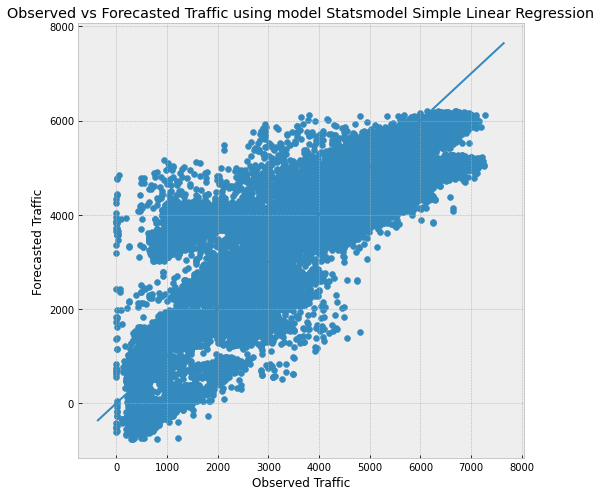

In [ ]:
plot_predvstrue_reg(m.fittedvalues, dataset.traffic_volume, model_name = 'Statsmodel Simple Linear Regression')

# SkLearn Linear Regression

In [ ]:
# Keeping only the necessary columns; day columns were removed because there is 0 to none monthly seasonality in the data    
traffic_lin = dataset.drop(['is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'dew_point','temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_description', 'Day', 'weekday'],axis=1)

In [ ]:
# creating categorical columns for linear regression 
cat_cols = ['Year', 'Month', 'Hour', 'non_working']
for col in cat_cols:
    traffic_lin[col] = traffic_lin[col].astype('category')

In [ ]:
# Preparing dummy columns for use in sklearn's linear regression 
traffic_lin = pd.get_dummies(traffic_lin[['Hour',	'Month',	'Year',	'non_working']], drop_first = True)
traffic_lin['traffic_volume'] = dataset['traffic_volume']
traffic_lin['weather_type'] = dataset['weather_type']
traffic_lin['visibility_in_miles'] = dataset['visibility_in_miles']
traffic_lin['date_time'] = dataset['date_time']
traffic_lin.set_index(['date_time'],inplace=True)

In [ ]:
traffic_lin.head()

,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,non_working_working,traffic_volume,weather_type,visibility_in_miles
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,5545,9.0,1
2012-10-02 10:00:00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,4516,9.0,1
2012-10-02 11:00:00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,4767,9.0,2
2012-10-02 12:00:00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,5026,9.0,5
2012-10-02 13:00:00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,4918,9.0,7


In [ ]:
# Creating the train and test data
# A test_size of 0.15 gives us a training set of about 3 years and 9 months and a test set of 9 months

cols_to_transform = None # other columns are binary values
X_train, X_test, y_train, y_test = train_test(traffic_lin, test_size = 0.15)

# This creates a LinearRegression object
lm = LinearRegression()

In [ ]:
# Fitting the linear regression model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

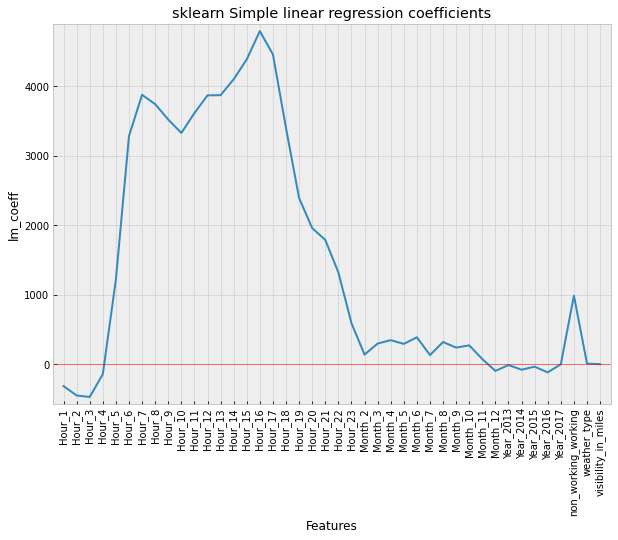

In [ ]:
# Plotting the coefficients to check the importance of each coefficient 
# Plot the coefficients
_ = plt.figure(figsize = (10, 7))
_ = plt.plot(range(len(X_train.columns)), lm.coef_)
_ = plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation = 90)
_ = plt.margins(0.02)
_ = plt.axhline(0, linewidth = 0.5, color = 'r')
_ = plt.title('sklearn Simple linear regression coefficients')
_ = plt.ylabel('lm_coeff')
_ = plt.xlabel('Features')

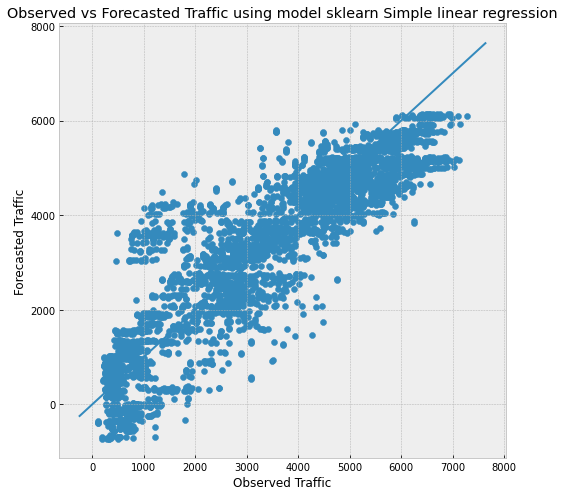

In [ ]:
# Plotting lm.predict(X) vs observed Traffic
plot_predvstrue_reg(lm.predict(X_test), y_test, model_name = 'sklearn Simple linear regression')

In [ ]:
error_metrics(lm.predict(X_train), y_train, model_name = 'Simple linear regression with scaling Train', test = False)


Error metrics for model Simple linear regression with scaling Train
RMSE or Root mean squared error: 833.01
Variance score: 0.83
Mean Absolute Error: 608.80


In [ ]:
# on test set
error_metrics(lm.predict(X_test), y_test, model_name = 'Simple linear regression with scaling Test', test = True)


Error metrics for model Simple linear regression with scaling Test
RMSE or Root mean squared error: 809.27
Variance score: 0.83
Mean Absolute Error: 606.25


In [ ]:
# Plotting the predicted values with the original time series (test set)
plot_ts_pred(y_test, lm.predict(X_test), model_name='Simple linear regression with scaling', 
             og_ts_opacity = 0.5, pred_ts_opacity = 0.5)

# Reducing the feature space

- In the above models we had used hot encoded variables
like hour_1, hour_2,..., month_2, month_3,.. etc. This results in a loss of information because the model assumes that 23rd hour is far away from the 0th hour (and same for months, month_12 is far away from month_1) which is not the case because the time series is periodic and the 0th hour is as much closer to the 23rd hour as it is to the 1st hour. To avoid the loss of information and to lower the number of predictor variables we'll try some feature engineering on the X space.

- We'll also emit the month and weekday columns because the season column captures the months feature anyways. So the number of X variables used in the models below will be considerably lower than the above models.

In [ ]:
traffic_feature = dataset.copy()

In [ ]:
# Dividing the hours into 4 groups-> night, morning, afternoon, evening
hour_dict = {'morning': list(np.arange(6,13)),'afternoon': list(np.arange(13,16)), 'evening': list(np.arange(16,23)),
            'night': [23, 0, 1, 2, 3, 4, 5]}

In [ ]:
def time_of_day(x):
    if x in hour_dict['morning']:
        return 'morning'
    elif x in hour_dict['afternoon']:
        return 'afternoon'
    elif x in hour_dict['evening']:
        return 'evening'
    else:
        return 'night'

In [ ]:
traffic_feature['time_of_day'] = dataset['Hour'].apply(time_of_day)

In [ ]:
traffic_feature.set_index(['date_time'],inplace=True)
traffic_feature.drop(['is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'dew_point','temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_description', 'Day', 'weekday'],axis=1,inplace=True)
traffic_feature.head()

,visibility_in_miles,weather_type,traffic_volume,Hour,Month,Year,non_working,time_of_day
date_time,,,,,,,,
2012-10-02 09:00:00,1,9.0,5545,9,10,2012,working,morning
2012-10-02 10:00:00,1,9.0,4516,10,10,2012,working,morning
2012-10-02 11:00:00,2,9.0,4767,11,10,2012,working,morning
2012-10-02 12:00:00,5,9.0,5026,12,10,2012,working,morning
2012-10-02 13:00:00,7,9.0,4918,13,10,2012,working,afternoon


In [ ]:
traffic_lag = pd.get_dummies(traffic_feature[['non_working',	'time_of_day']],drop_first=True)
traffic_lag['visibility_in_miles'] =traffic_feature['visibility_in_miles']
traffic_lag['weather_type'] =traffic_feature['weather_type']
traffic_lag['traffic_volume'] =traffic_feature['traffic_volume']
traffic_lag['Year'] = traffic_feature['Year']

In [ ]:
# Choosing a subset of the above dataframe; the hour bins
datasetcyc = traffic_lag.drop([col for col in traffic_lag if col.startswith('time')], axis=1)
datasetcyc.head()

,non_working_working,visibility_in_miles,weather_type,traffic_volume,Year
date_time,,,,,
2012-10-02 09:00:00,1,1,9.0,5545,2012
2012-10-02 10:00:00,1,1,9.0,4516,2012
2012-10-02 11:00:00,1,2,9.0,4767,2012
2012-10-02 12:00:00,1,5,9.0,5026,2012
2012-10-02 13:00:00,1,7,9.0,4918,2012


# Elastic Net Regression

In [ ]:
def trend_model(data, cols_to_transform, l1_space, alpha_space, cols_use = 0, scale = True, test_size = 0.15, 
                include_test_scale=False):
    """
    Tuning, fitting and predicting with an Elastic net regression model.
    data: time series dataframe including X and y variables
    col_use: columns including the y variable to be used from the data
    cols_to_transform: columns to be scaled using StandardScaler if scale = True
    l1_space: potential values to try for the l1_ratio parameter of the elastic net regression
    include_test_scale: If True then the StandardScaler will be fit on the entire dataset instead of just the training set
    
    A note about l1_ratio: The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. 
    For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. 
    For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.
    """
    
    # Creating the train test split
    if cols_use != 0:
        df = data[cols_use]
    else:
        df = data
    
    X_train, X_test, y_train, y_test = train_test(df, test_size = test_size, 
                                              scale = scale, cols_to_transform=cols_to_transform, 
                                              include_test_scale=include_test_scale)

    
    # Create the hyperparameter grid
    #l1_space = np.linspace(0, 1, 50)
    param_grid = {'l1_ratio': l1_space, 'alpha': alpha_space}

    # Instantiate the ElasticNet regressor: elastic_net
    elastic_net = ElasticNet()

    # for time-series cross-validation set 5 folds
    tscv = TimeSeriesSplit(n_splits=5)

    # Setup the GridSearchCV object: gm_cv ...trying 5 fold cross validation 
    gm_cv = GridSearchCV(elastic_net, param_grid, cv = tscv)

    # Fit it to the training data
    gm_cv.fit(X_train, y_train)

    # Predict on the test set and compute metrics
    y_pred = gm_cv.predict(X_test)
    r2 = gm_cv.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
    print("Tuned ElasticNet R squared: {}".format(r2))
    print("Tuned ElasticNet RMSE: {}".format(np.sqrt(mse)))
    # fitting the elastic net again using the best model from above

    elastic_net_opt = ElasticNet(l1_ratio = gm_cv.best_params_['l1_ratio']) 
    elastic_net_opt.fit(X_train, y_train)
    
    # Plot the coefficients
    _ = plt.figure(figsize = (15, 7))
    _ = plt.plot(range(len(X_train.columns)), elastic_net_opt.coef_)
    _ = plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation = 90)
    _ = plt.margins(0.02)
    _ = plt.axhline(0, linewidth = 0.5, color = 'r')
    _ = plt.title('significane of features as per Elastic regularization')
    _ = plt.ylabel('Elastic net coeff')
    _ = plt.xlabel('Features')
    
    # Plotting y_true vs predicted
    _ = plt.figure(figsize = (5,5))
    _ = plot_predvstrue_reg(elastic_net_opt.predict(X_test), y_test, model_name = 'Elastic net optimal linear regression')
    
    # returns the train and test X and y sets and also the optimal model
    return X_train, X_test, y_train, y_test, elastic_net_opt

In [ ]:
# Choosing a subset of the above dataframe; the hour bins
traffic_en = traffic_lag.copy()
traffic_en.head()

,non_working_working,time_of_day_evening,time_of_day_morning,time_of_day_night,visibility_in_miles,weather_type,traffic_volume,Year
date_time,,,,,,,,
2012-10-02 09:00:00,1,0,1,0,1,9.0,5545,2012
2012-10-02 10:00:00,1,0,1,0,1,9.0,4516,2012
2012-10-02 11:00:00,1,0,1,0,2,9.0,4767,2012
2012-10-02 12:00:00,1,0,1,0,5,9.0,5026,2012
2012-10-02 13:00:00,1,0,0,0,7,9.0,4918,2012


In [ ]:
data = traffic_en
cols_to_transform = ['Year']
l1_space = np.linspace(0, 1, 30)
alpha_space = np.logspace(-2, 0, 30)

Tuned ElasticNet l1 ratio: {'alpha': 1.0, 'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.6799907797507359
Tuned ElasticNet RMSE: 1119.7375804830997


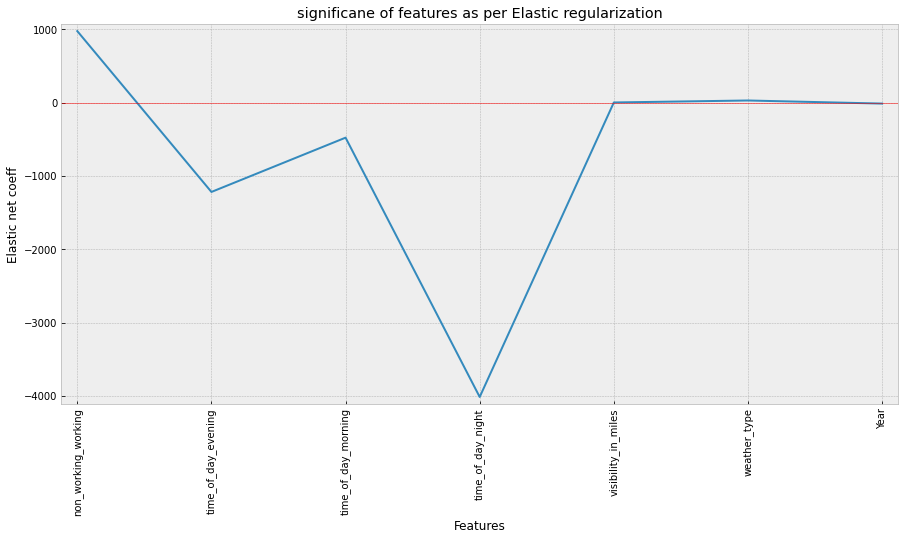

<Figure size 360x360 with 0 Axes>

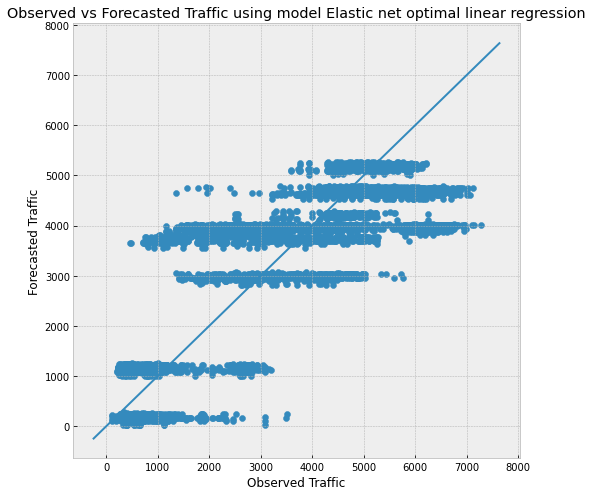

In [ ]:
# Fitting, tuning and predicting using the best elastic net regression model
X_train, X_test, y_train, y_test, elastic_net_opt = trend_model(data=data, cols_to_transform=cols_to_transform, 
                                                                l1_space=l1_space, alpha_space=alpha_space,
                                                                scale = True, test_size = 0.15, include_test_scale=False)

In [ ]:
# Plotting the observed test traffic and predicted traffic data on the same graph as line plots
plot_ts_pred(y_test, elastic_net_opt.predict(X_test), model_name='Optimal Elastic net regression', \
             og_ts_opacity = 0.5, pred_ts_opacity = 0.5)

In [ ]:
# printing the error metrics
print('Elastic net regression on training set')
error_metrics(elastic_net_opt.predict(X_train), y_train, model_name = 'Tuned elastic net regression with reduced hour space', 
              test = False)

print('\nElastic net regression on test set')
error_metrics(elastic_net_opt.predict(X_test), y_test, model_name = 'Tuned elastic net regression with reduced hour space', 
              test = True)

Elastic net regression on training set

Error metrics for model Tuned elastic net regression with reduced hour space
RMSE or Root mean squared error: 1135.18
Variance score: 0.68
Mean Absolute Error: 888.97

Elastic net regression on test set

Error metrics for model Tuned elastic net regression with reduced hour space
RMSE or Root mean squared error: 1119.74
Variance score: 0.68
Mean Absolute Error: 878.80


# XGBoost

In [ ]:
# generating the model
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 5, n_estimators = 100, random_state=42)

In [ ]:
# Fitting the model on the training set
xg_reg.fit(X_train, y_train)

[14:40:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# Predicting on test set
preds_boost = xg_reg.predict(X_test)

In [ ]:
_ = error_metrics(xg_reg.predict(X_train), y_train, model_name='XGBoost- Train', test=False)


Error metrics for model XGBoost- Train
RMSE or Root mean squared error: 1147.90
Variance score: 0.67
Mean Absolute Error: 933.43


In [ ]:
_ = error_metrics(preds_boost, y_test, model_name='XGBoost- Test', test=True)


Error metrics for model XGBoost- Test
RMSE or Root mean squared error: 1130.10
Variance score: 0.67
Mean Absolute Error: 917.18


# EN using Fourier Terms

In [ ]:
# We can add multiple fourer series with different k terms in the (2*k*pi) such as k=1,2,3...etc. To generalize the problem, 
# we could have chosen an optimal k value for each season by trying out some k values and choosing the values giving 
#the lowest AIC.

def add_fourier_terms(df, year_k, week_k, day_k):
    """
    df: dataframe to add the fourier terms to 
    year_k: the number of Fourier terms the year period should have. Thus the model will be fit on 2*year_k terms (1 term for 
    sine and 1 for cosine)
    week_k: same as year_k but for weekly periods
    day_k:same as year_k but for daily periods
    """
    
    for k in range(1, year_k+1):
        # year has a period of 365.25 including the leap year
        df['year_sin'+str(k)] = np.sin(2 *k* np.pi * df.index.dayofyear/365.25) 
        df['year_cos'+str(k)] = np.cos(2 *k* np.pi * df.index.dayofyear/365.25)

    for k in range(1, week_k+1):
        
        # week has a period of 7
        df['week_sin'+str(k)] = np.sin(2 *k* np.pi * df.index.dayofweek/7)
        df['week_cos'+str(k)] = np.cos(2 *k* np.pi * df.index.dayofweek/7)


    for k in range(1, day_k+1):
        
        # day has period of 24
        df['hour_sin'+str(k)] = np.sin(2 *k* np.pi * df.index.hour/24)
        df['hour_cos'+str(k)] = np.cos(2 *k* np.pi * df.index.hour/24) 

In [ ]:
add_fourier_terms(traffic_lag, year_k= 5, week_k=5 , day_k=5)

In [ ]:
traffic_lag.head()

,non_working_working,time_of_day_evening,time_of_day_morning,time_of_day_night,visibility_in_miles,weather_type,traffic_volume,Year,year_sin1,year_cos1,year_sin2,year_cos2,year_sin3,year_cos3,year_sin4,year_cos4,year_sin5,year_cos5,week_sin1,week_cos1,week_sin2,week_cos2,week_sin3,week_cos3,week_sin4,week_cos4,week_sin5,week_cos5,hour_sin1,hour_cos1,hour_sin2,hour_cos2,hour_sin3,hour_cos3,hour_sin4,hour_cos4,hour_sin5,hour_cos5
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,1,0,1,0,1,9.0,5545,2012,-0.999371,0.035473,-0.0709,-0.997483,0.994341,-0.106239,0.141444,0.989946,-0.984306,0.176471,0.781831,0.62349,0.974928,-0.222521,0.433884,-0.900969,-0.433884,-0.900969,-0.974928,-0.222521,7.071068e-01,-0.707107,-1.000000e+00,-1.836970e-16,7.071068e-01,7.071068e-01,3.673940e-16,-1.0,-7.071068e-01,0.707107
2012-10-02 10:00:00,1,0,1,0,1,9.0,4516,2012,-0.999371,0.035473,-0.0709,-0.997483,0.994341,-0.106239,0.141444,0.989946,-0.984306,0.176471,0.781831,0.62349,0.974928,-0.222521,0.433884,-0.900969,-0.433884,-0.900969,-0.974928,-0.222521,5.000000e-01,-0.866025,-8.660254e-01,5.000000e-01,1.000000e+00,1.194340e-15,-8.660254e-01,-0.5,5.000000e-01,0.866025
2012-10-02 11:00:00,1,0,1,0,2,9.0,4767,2012,-0.999371,0.035473,-0.0709,-0.997483,0.994341,-0.106239,0.141444,0.989946,-0.984306,0.176471,0.781831,0.62349,0.974928,-0.222521,0.433884,-0.900969,-0.433884,-0.900969,-0.974928,-0.222521,2.588190e-01,-0.965926,-5.000000e-01,8.660254e-01,7.071068e-01,-7.071068e-01,-8.660254e-01,0.5,9.659258e-01,-0.258819
2012-10-02 12:00:00,1,0,1,0,5,9.0,5026,2012,-0.999371,0.035473,-0.0709,-0.997483,0.994341,-0.106239,0.141444,0.989946,-0.984306,0.176471,0.781831,0.62349,0.974928,-0.222521,0.433884,-0.900969,-0.433884,-0.900969,-0.974928,-0.222521,1.224647e-16,-1.000000,-2.449294e-16,1.000000e+00,3.673940e-16,-1.000000e+00,-4.898587e-16,1.0,2.388680e-15,-1.000000
2012-10-02 13:00:00,1,0,0,0,7,9.0,4918,2012,-0.999371,0.035473,-0.0709,-0.997483,0.994341,-0.106239,0.141444,0.989946,-0.984306,0.176471,0.781831,0.62349,0.974928,-0.222521,0.433884,-0.900969,-0.433884,-0.900969,-0.974928,-0.222521,-2.588190e-01,-0.965926,5.000000e-01,8.660254e-01,-7.071068e-01,-7.071068e-01,8.660254e-01,0.5,-9.659258e-01,-0.258819


In [ ]:
# Choosing a subset of the above dataframe; removing the lags and the hour bins
datasetcyc = traffic_lag.drop([col for col in traffic_lag if col.startswith('time')], axis=1)
datasetcyc.head()

,non_working_working,visibility_in_miles,weather_type,traffic_volume,Year,year_sin1,year_cos1,year_sin2,year_cos2,year_sin3,year_cos3,year_sin4,year_cos4,year_sin5,year_cos5,week_sin1,week_cos1,week_sin2,week_cos2,week_sin3,week_cos3,week_sin4,week_cos4,week_sin5,week_cos5,hour_sin1,hour_cos1,hour_sin2,hour_cos2,hour_sin3,hour_cos3,hour_sin4,hour_cos4,hour_sin5,hour_cos5
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,1,1,9.0,5545,2012,-0.999371,0.035473,-0.0709,-0.997483,0.994341,-0.106239,0.141444,0.989946,-0.984306,0.176471,0.781831,0.62349,0.974928,-0.222521,0.433884,-0.900969,-0.433884,-0.900969,-0.974928,-0.222521,7.071068e-01,-0.707107,-1.000000e+00,-1.836970e-16,7.071068e-01,7.071068e-01,3.673940e-16,-1.0,-7.071068e-01,0.707107
2012-10-02 10:00:00,1,1,9.0,4516,2012,-0.999371,0.035473,-0.0709,-0.997483,0.994341,-0.106239,0.141444,0.989946,-0.984306,0.176471,0.781831,0.62349,0.974928,-0.222521,0.433884,-0.900969,-0.433884,-0.900969,-0.974928,-0.222521,5.000000e-01,-0.866025,-8.660254e-01,5.000000e-01,1.000000e+00,1.194340e-15,-8.660254e-01,-0.5,5.000000e-01,0.866025
2012-10-02 11:00:00,1,2,9.0,4767,2012,-0.999371,0.035473,-0.0709,-0.997483,0.994341,-0.106239,0.141444,0.989946,-0.984306,0.176471,0.781831,0.62349,0.974928,-0.222521,0.433884,-0.900969,-0.433884,-0.900969,-0.974928,-0.222521,2.588190e-01,-0.965926,-5.000000e-01,8.660254e-01,7.071068e-01,-7.071068e-01,-8.660254e-01,0.5,9.659258e-01,-0.258819
2012-10-02 12:00:00,1,5,9.0,5026,2012,-0.999371,0.035473,-0.0709,-0.997483,0.994341,-0.106239,0.141444,0.989946,-0.984306,0.176471,0.781831,0.62349,0.974928,-0.222521,0.433884,-0.900969,-0.433884,-0.900969,-0.974928,-0.222521,1.224647e-16,-1.000000,-2.449294e-16,1.000000e+00,3.673940e-16,-1.000000e+00,-4.898587e-16,1.0,2.388680e-15,-1.000000
2012-10-02 13:00:00,1,7,9.0,4918,2012,-0.999371,0.035473,-0.0709,-0.997483,0.994341,-0.106239,0.141444,0.989946,-0.984306,0.176471,0.781831,0.62349,0.974928,-0.222521,0.433884,-0.900969,-0.433884,-0.900969,-0.974928,-0.222521,-2.588190e-01,-0.965926,5.000000e-01,8.660254e-01,-7.071068e-01,-7.071068e-01,8.660254e-01,0.5,-9.659258e-01,-0.258819


Tuned ElasticNet l1 ratio: {'alpha': 0.6210169418915616, 'l1_ratio': 0.9655172413793103}
Tuned ElasticNet R squared: 0.834147937351433
Tuned ElasticNet RMSE: 806.1121126714966


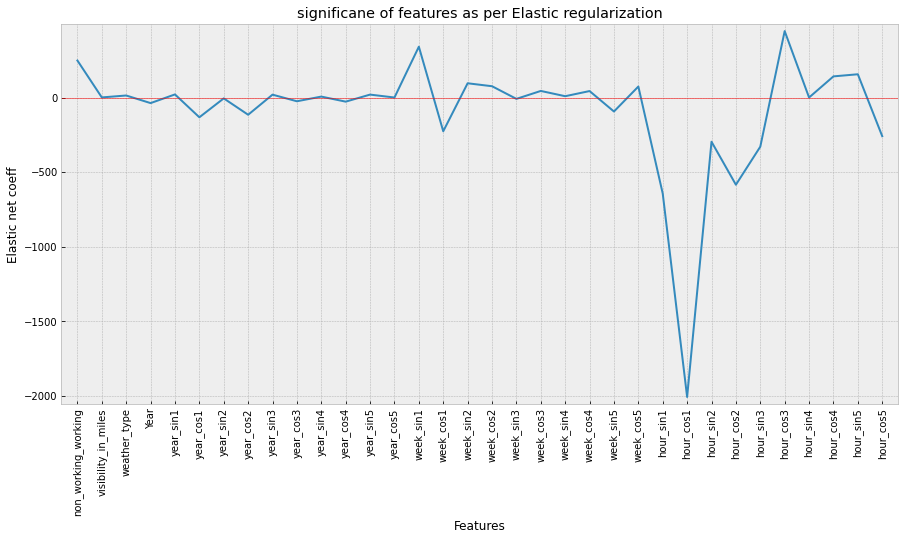

<Figure size 360x360 with 0 Axes>

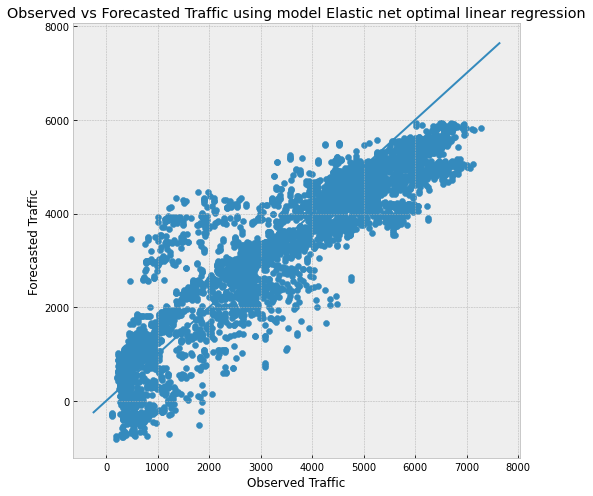

In [ ]:
# Fitting Elastic Net Regression model on the data with the fourier series
data = datasetcyc
cols_to_transform = ['Year']
l1_space = np.linspace(0, 1, 30)
alpha_space = np.logspace(-2, 0, 30)

X_trainF, X_testF, y_trainF, y_testF, elastic_net_opt_F = trend_model(data=data, cols_to_transform=cols_to_transform, 
                                                                l1_space=l1_space, alpha_space=alpha_space,
                                                                scale = True, test_size = 0.15, include_test_scale=False)

In [ ]:
elastic_net_opt_F.fit(X_trainF,y_trainF)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
           l1_ratio=0.9655172413793103, max_iter=1000, normalize=False,
           positive=False, precompute=False, random_state=None,
           selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Predicting on test set
preds_en = elastic_net_opt_F.predict(X_testF)

In [ ]:
# Predicting on train set
preds_train_en = elastic_net_opt_F.predict(X_trainF)

In [ ]:
# printing the error metrics
print('Elastic net regression on training set')
_=error_metrics(preds_train_en, y_trainF, model_name = 'Tuned elastic net regression with Fourier terms', 
              test = False)

print('\nElastic net regression on test set')
_=error_metrics(preds_en, y_testF, model_name = 'Tuned elastic net regression with Fourier terms', 
              test = True)

Elastic net regression on training set

Error metrics for model Tuned elastic net regression with Fourier terms
RMSE or Root mean squared error: 832.50
Variance score: 0.83
Mean Absolute Error: 623.08

Elastic net regression on test set

Error metrics for model Tuned elastic net regression with Fourier terms
RMSE or Root mean squared error: 810.57
Variance score: 0.83
Mean Absolute Error: 619.21


# XGBoost using Fourier Terms

In [ ]:
# Fitting the model on the training set
xg_reg.fit(X_trainF, y_trainF)

[15:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# Predicting on test set
preds_boost = xg_reg.predict(X_testF)

In [ ]:
_ = error_metrics(xg_reg.predict(X_trainF), y_trainF, model_name='XGBoost with Fourier terms', test= False)


Error metrics for model XGBoost with Fourier terms
RMSE or Root mean squared error: 482.92
Variance score: 0.94
Mean Absolute Error: 318.80


In [ ]:
_ = error_metrics(preds_boost, y_testF, model_name='XGBoost with Fourier terms', test=True)


Error metrics for model XGBoost with Fourier terms
RMSE or Root mean squared error: 466.52
Variance score: 0.94
Mean Absolute Error: 329.92


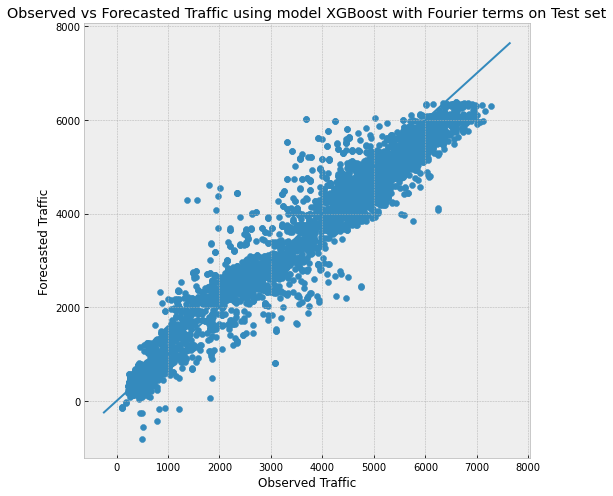

In [ ]:
plot_predvstrue_reg(preds_boost,y_testF, model_name='XGBoost with Fourier terms on Test set')

check the error metrics on the max daily demand forecast of the model as well.

In [ ]:
# converting the predictions into series so that we can use the .resample method on it
preds_boost_series = pd.Series(preds_boost, index = y_testF.index )
# Resampling both the y_test and predictions at a 24 hours period and using the max as the aggregate function
_ = error_metrics(preds_boost_series.resample('24h').max(), 
                  y_testF.resample('24h').max(), 
                  model_name='XGBoost with Fourier terms; daily MAX', test=True)


Error metrics for model XGBoost with Fourier terms; daily MAX
RMSE or Root mean squared error: 599.52
Variance score: 0.58
Mean Absolute Error: 529.48


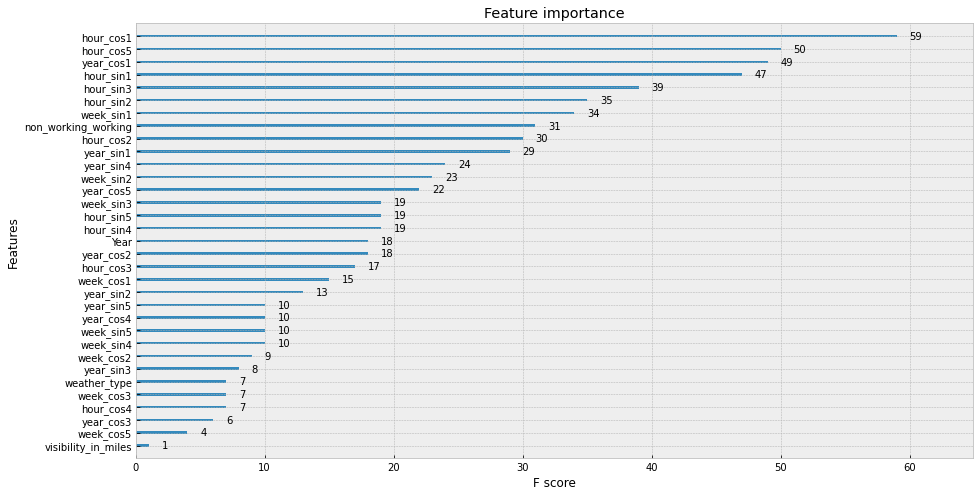

In [ ]:
#pd.plotting.register_matplotlib_converters()
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 9]

## Tuning the hyper parameters for the XGBoost model

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(10, 200, 10, endpoint=True)]
max_features = ['auto', 'sqrt']
max_depth = list(range(1,6))
# Create the random grid
random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth':max_depth}
print(random_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5]}


In [ ]:
param_grid = {
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}

tscv = TimeSeriesSplit(n_splits=3)
xgbtunedreg = RandomizedSearchCV(xg_reg, param_distributions=param_grid , 
                                   scoring='neg_mean_squared_error', n_iter=20, n_jobs=-1, 
                                   cv=tscv, verbose=2, random_state=42)

xgbtunedreg.fit(X_trainF, y_trainF)
best_score = xgbtunedreg.best_score_
best_params = xgbtunedreg.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.6min finished


[15:29:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score: -258198.31427985476
Best params: 
colsample_bylevel: 0.9
colsample_bytree: 0.6
gamma: 0
learning_rate: 0.1
max_depth: 6
min_child_weight: 5.0
n_estimators: 73
subsample: 0.9


In [ ]:
preds_boost_tuned = xgbtunedreg.predict(X_testF)

In [ ]:
_ = error_metrics(preds_boost_tuned, y_testF, model_name='Tuned XGBoost with Fourier terms', test=True)


Error metrics for model Tuned XGBoost with Fourier terms
RMSE or Root mean squared error: 408.16
Variance score: 0.96
Mean Absolute Error: 264.58


In [ ]:
_ = error_metrics(xgbtunedreg.predict(X_trainF), y_trainF, model_name='Tuned XGBoost with Fourier terms', test=False)


Error metrics for model Tuned XGBoost with Fourier terms
RMSE or Root mean squared error: 326.72
Variance score: 0.97
Mean Absolute Error: 204.29


In [ ]:
plot_ts_pred(y_testF, preds_boost_tuned, model_name='Tuned XGBoost with Fourier terms on test')

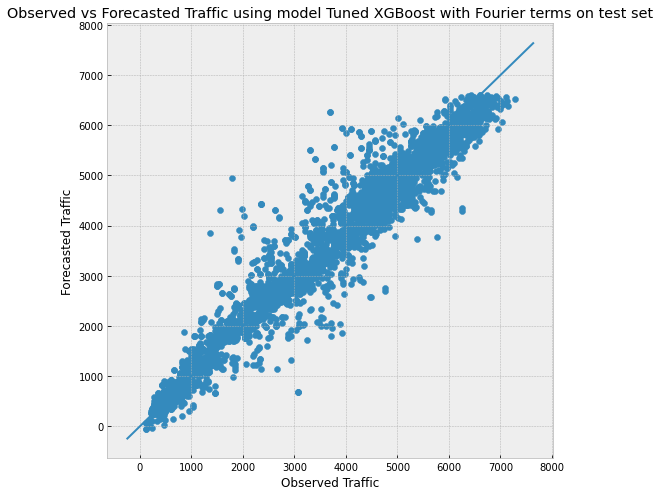

In [ ]:
plot_predvstrue_reg(preds_boost_tuned,y_testF, model_name='Tuned XGBoost with Fourier terms on test set')

# Predictions

In [ ]:
drive.mount('/drive')

Mounted at /drive


In [ ]:
with open('/drive/My Drive/Colab Notebooks/traffic_predict','wb') as f:
  pickle.dump(xgbtunedreg,f)

In [ ]:
test = files.upload()

Saving Test.csv to Test.csv


In [ ]:
df_test = pd.read_csv('Test.csv')
df_test['date_time']  =  pd.to_datetime(df_test['date_time'],infer_datetime_format = True)  
df_test['Hour'] = df_test['date_time'].dt.hour
df_test['Day'] = df_test['date_time'].dt.day
df_test['Month'] = df_test['date_time'].dt.month
df_test['Year'] = df_test['date_time'].dt.year
df_test['is_holiday'] = df_test['is_holiday'].map(lambda x: 0 if x=='None' else 1)
df_test['weather_type'] = df_test['weather_type'].astype('category')
df_test['weather_type'] = encoder.transform(df_test.loc[:,['weather_type']])
weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}
df_test['weekday'] = df_test.date_time.dt.weekday.map(weekdays)
df_test['non_working'] = df_test.apply(lambda x: 'non-working' if \
                                         ((x['is_holiday'] == 1) or (x['weekday'] in ['Saturday', 'Sunday']))
                                         else 'working', axis = 1)
df_test = df_test.drop(['is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'dew_point','temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 
       'weather_description', 'Day', 'weekday'],axis=1)
df_test.set_index(['date_time'],inplace=True)
df_test['time_of_day'] = df_test['Hour'].apply(time_of_day)
df_lag_test = pd.get_dummies(df_test[['non_working',	'time_of_day']],drop_first=True)
df_lag_test['visibility_in_miles'] =df_test['visibility_in_miles']
df_lag_test['weather_type'] =df_test['weather_type']
df_lag_test['Year'] = df_test['Year']
add_fourier_terms(df_lag_test, year_k= 5, week_k=5 , day_k=5)
test_cyc = df_lag_test.drop([col for col in df_lag_test if col.startswith('time')], axis=1)

In [ ]:
predictions = xgbtunedreg.predict(test_cyc)

In [ ]:
df_test['traffic_volume'] =predictions
predicted_df = df_test[['traffic_volume']]
predicted_df.head()

,traffic_volume
date_time,
2017-05-18 00:00:00,709.023376
2017-05-18 00:00:00,707.372803
2017-05-18 00:00:00,709.023376
2017-05-18 01:00:00,471.469971
2017-05-18 01:00:00,483.610657


In [ ]:
predicted_df.to_csv('Traffic submission.csv')
files.download('Traffic submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>